# K Nearest Neighbor

KNN is based in feature similarity. We can do classification using KNN Classifier.

K Nearest Neighbor is one of the simplies Supervised learning algorithms.

It classifies a data point based on how its neighbors are classified.

KNN stores all available cases and classifies new cases based on a similarity measure.

**What is** ***k***  **in KNN?**

k is a parameter that refers to the number of nearest neighbors to include in the majority voring process.<br>
Choosing the right value of a ***k*** is a process called *parameter tuning* and it is important for better accuracy.

To choose a value for ***k***:
* √n, where n is the total number of data points
* use GridSearchCV

In case of two classes choose odd ***k*** value to avoid confusion.

**When do we use KNN?**
1. Data is labeled,
2. Data is noise free (clean)
3. Data is small.

KNN is a **lazy learner**, we don't use it with large data, because ut doesn't learn from the training set immediately, instead, it stores the dataset and at the time of classification, it performs an action on the dataset.

### USE CASE: Predict if a person has diabetes or not.

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, auc, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are some features that can't take 0 as a value, so we will replace 0s with mean values:

In [5]:
# replaces zeros to mean
non_zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for feature in non_zero_features:
    data[feature] = data[feature].replace(0, np.nan)
    mean = int(data[feature].mean(skipna=True))
    data[feature].fillna(mean, inplace=True)

In [6]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Feature Scaling

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Cross Validation

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

## Hyperparameter tuning

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [8]:
knn = KNeighborsClassifier(metric='euclidean')
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10,  verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
0.7691125087351502
{'n_neighbors': 21}


So the optimal value for our ***k*** is 21.

## Define a model

In [9]:
n_neighbors = grid_search.best_params_['n_neighbors']

classifier = KNeighborsClassifier(n_neighbors=n_neighbors, p=2, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [10]:
# predict the results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# Model Evaluation

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[130,  20],
       [ 37,  44]], dtype=int64)

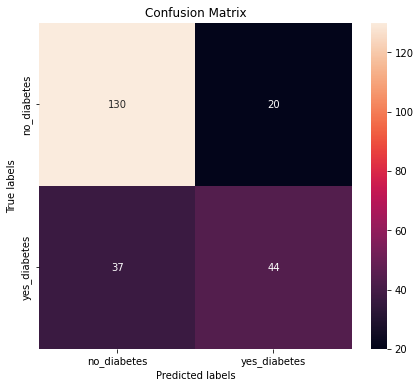

In [12]:
df_cm = pd.DataFrame(cm)
df_cm = df_cm.round()
plt.figure(figsize=(7,6))

ax = plt.subplot()
sns.heatmap(df_cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no_diabetes', 'yes_diabetes']); ax.yaxis.set_ticklabels(['no_diabetes', 'yes_diabetes']);

plt.show()

### ROC (Reciever Operating Charecteristic) curve

ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity (Recall) and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

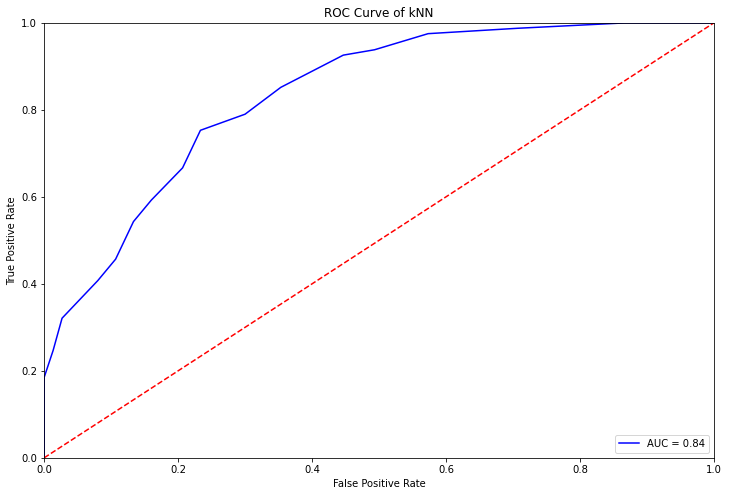

In [13]:
y_scores = classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [14]:
roc_auc_score(y_test,y_pred)

0.7049382716049383